<a href="https://colab.research.google.com/github/Nagarjun-CS/Health_Care_Bill_Prediction/blob/main/Health_Care_Bill_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Healthcare costs and patient outcomes are significantly impacted by various factors such as medical conditions, length of stay, room type, and patient demographics. To provide actionable insights into these areas, I developed a Healthcare Analysis Dashboard in November 2023 for a hospital in India. The dashboard visualizes trends in patient data, healthcare costs, and treatment distributions, enabling hospital management to make data-driven decisions that improve efficiency and patient care.

# **Ideology**

The main ideology behind this project is to use data analytics to uncover the key drivers of healthcare costs and identify patterns in patient care. By understanding how factors such as age, medical conditions, length of stay, and room type influence hospital expenses, healthcare providers can make informed decisions to optimize operational efficiency. The project aims to bring transparency to the billing process and highlight areas where the hospital can improve patient outcomes while managing costs effectively.

# **Approach**

1. **Data Gathering:** Patient data was collected using Snowflake, ensuring a scalable and efficient data storage solution.
2. **Data Transformation:** Using SQL, I performed data cleaning, transformations, and joins to prepare the data for analysis.
3. **Visualization:** The data was then visualized using Tableau, where I created interactive charts and dashboards to track key metrics such as average billing amount, cost distribution by disease, and length of stay.
4. **Interactive Exploration:** I applied filters and slicers within the dashboard to allow users to dynamically explore healthcare trends, enabling more detailed insights into patient conditions, costs, and demographics.

# **Goal**

The primary goal of this project is to provide the hospital with a comprehensive view of how various factors influence healthcare costs. By identifying patterns in patient conditions, stay duration, and billing, the dashboard aims to support data-driven decision-making that enhances both operational efficiency and patient outcomes. This tool empowers hospital management to optimize resource allocation, reduce unnecessary costs, and improve the overall quality of care provided to patients.

# **Code**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from datetime import datetime, timedelta
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
Dataset = pd.read_excel("/content/drive/MyDrive/Data Analysis Projects/healthcare_dataset.xlsx")
Dataset

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Room Type
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,66669.570416,Elective,2022-12-01,Aspirin,Inconclusive,Special Private
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,71570.746878,Emergency,2023-06-15,Lipitor,Normal,Special Private
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,64449.854378,Emergency,2019-02-08,Lipitor,Normal,Special Private
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,35109.570533,Urgent,2020-05-03,Penicillin,Abnormal,Semi-Private
4,Mrs. Brandy Flowers,51,Male,O-,Diabetes,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,25352.498737,Urgent,2021-08-02,Paracetamol,Normal,Special Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,73937.026370,Elective,2022-08-02,Ibuprofen,Abnormal,Semi-Private
9996,Stephanie Evans,47,Female,AB+,Obesity,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,8943.051316,Emergency,2022-01-29,Ibuprofen,Normal,Semi-Private
9997,Christopher Martinez,54,Female,B-,Diabetes,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,77602.222905,Elective,2022-07-15,Ibuprofen,Normal,Standard Room
9998,Amanda Duke,84,Male,A+,Obesity,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,47202.786684,Urgent,2020-02-26,Penicillin,Normal,Special Private


In [4]:
healthCareData = Dataset.copy()

In [5]:
healthCareData.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Room Type
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,66669.570416,Elective,2022-12-01,Aspirin,Inconclusive,Special Private
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,71570.746878,Emergency,2023-06-15,Lipitor,Normal,Special Private
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,64449.854378,Emergency,2019-02-08,Lipitor,Normal,Special Private
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,35109.570533,Urgent,2020-05-03,Penicillin,Abnormal,Semi-Private
4,Mrs. Brandy Flowers,51,Male,O-,Diabetes,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,25352.498737,Urgent,2021-08-02,Paracetamol,Normal,Special Private


In [6]:
healthCareData.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [7]:
healthCareData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Admission Type      10000 non-null  object 
 11  Discharge Date      10000 non-null  object 
 12  Medication          10000 non-null  object 
 13  Test Results        10000 non-null  object 
 14  Room Type           10000 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+

In [8]:
healthCareData.describe()

,Age,Billing Amount
count,10000.000000,10000.000000
mean,51.452200,40119.906652
std,19.588974,23051.906576
min,18.000000,1275.096846
25%,35.000000,20824.138691
50%,52.000000,39121.063930
75%,68.000000,58065.650984
max,85.000000,112230.423569


In [9]:
# Count of unique values for categorical columns
healthCareData['Medical Condition'].value_counts()
healthCareData['Admission Type'].value_counts()
healthCareData['Room Type'].value_counts()

,count
Room Type,
Standard Room,3402
Special Private,3299
Semi-Private,3299


# **Exploratory Data Analysis (EDA)**

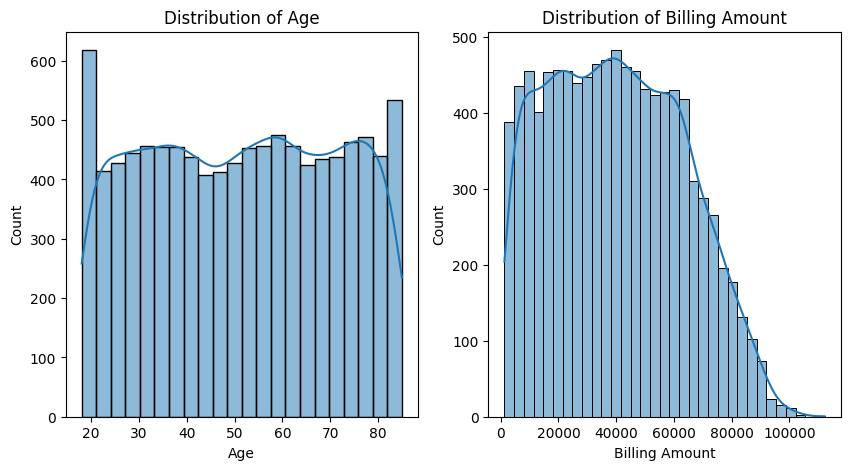

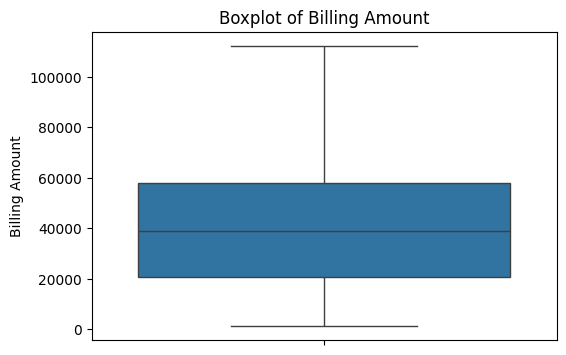

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age and Billing Amount
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(healthCareData['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(healthCareData['Billing Amount'], kde=True)
plt.title('Distribution of Billing Amount')
plt.show()

# Boxplot for Billing Amount
plt.figure(figsize=(6, 4))
sns.boxplot(y=healthCareData['Billing Amount'])
plt.title('Boxplot of Billing Amount')
plt.show()


**Key insights based on the two histograms:**

**1. Distribution of Age:**
  *   The age distribution appears fairly uniform, with a consistent number of patients across most age ranges.
  *   There are slightly more patients in the 20-30 and 80+ age groups, indicating that a higher number of younger adults and elderly patients are admitted for treatment.
  *   The age distribution is quite balanced between 30 and 80 years, indicating a broad representation of middle-aged and senior patients in the hospital's dataset.

**2. Distribution of Billing Amount:**
  *   The billing amount shows a right-skewed distribution, meaning most patients have billing amounts clustered between 20,000 to 60,000 units.
  *   The highest concentration of billing amounts lies around 40,000 units.
  *   Very few patients have extremely high billing amounts, with some reaching as high as 100,000 units, but these cases are rare, representing outliers in the dataset.
  








<ipython-input-11-c3be45406ab6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=healthCareData, palette=custom_palette, order=condition_order)
<ipython-input-11-c3be45406ab6>:10: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Medical Condition', data=healthCareData, palette=custom_palette, order=condition_order)


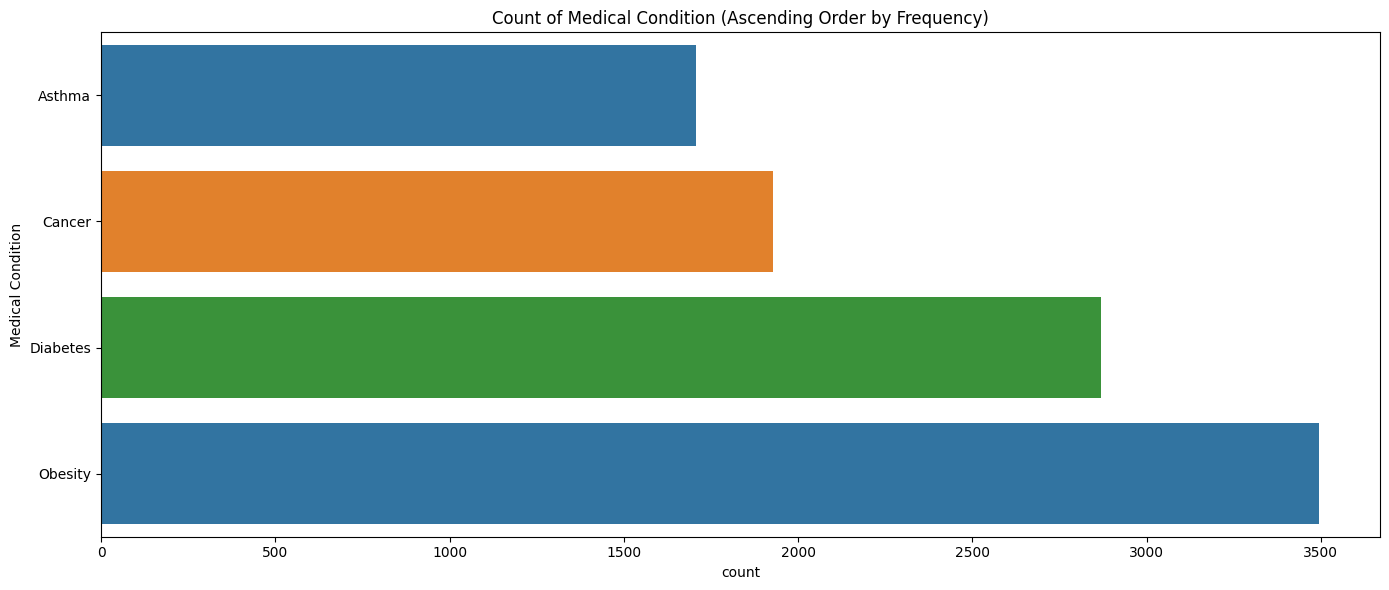

In [11]:
# Define a custom color palette with three different colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Get the value counts of the 'Medical Condition' in ascending order
condition_order = healthCareData['Medical Condition'].value_counts(ascending=True).index

# Count plot for 'Medical Condition' in ascending order of frequency
plt.figure(figsize=(14,6))

sns.countplot(y='Medical Condition', data=healthCareData, palette=custom_palette, order=condition_order)
plt.title('Count of Medical Condition (Ascending Order by Frequency)')

plt.tight_layout()
plt.show()


**Key insights based on the two histograms:**

1. **Obesity and diabetes** dominate the patient population in this dataset, suggesting that lifestyle-related conditions may be a significant driver of healthcare resource allocation.
2. **Cancer**, despite being less frequent, may account for higher healthcare costs due to its complex and long-term treatment requirements.
3. **Asthma**, while less frequent, is still a notable condition that affects a significant number of patients.

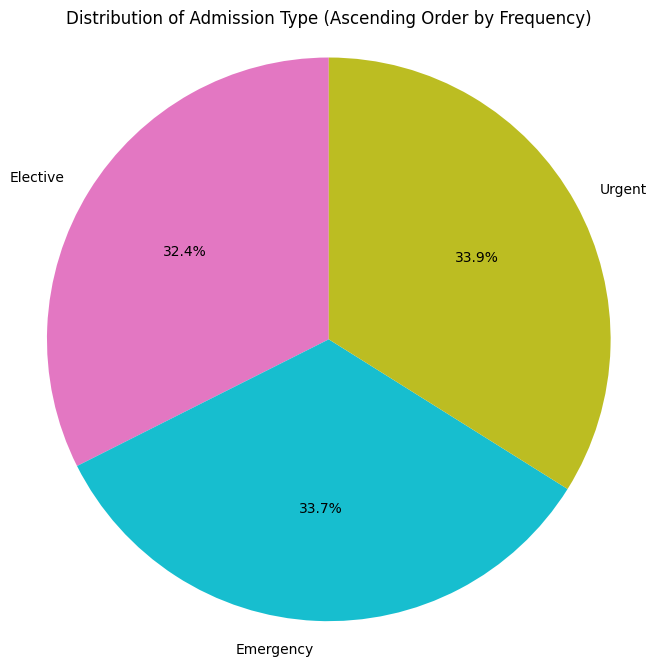

In [12]:
import matplotlib.pyplot as plt

# Get the value counts of the 'Admission Type' in ascending order
admission_counts = healthCareData['Admission Type'].value_counts(ascending=True)

# Define a custom color palette for the pie chart
colors = ['#e377c2', '#17becf', '#bcbd22']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(admission_counts, labels=admission_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Admission Type (Ascending Order by Frequency)')
plt.axis('equal')  # Ensures the pie chart is circular

plt.show()


**Key Insights:**

1. The distribution of admissions is relatively balanced among Urgent, Emergency, and Elective categories, with none of the categories dominating the others by a large margin.
2. This suggests that the hospital handles a mix of cases, from planned procedures to more critical, immediate care, with slightly more focus on Urgent and Emergency admissions.

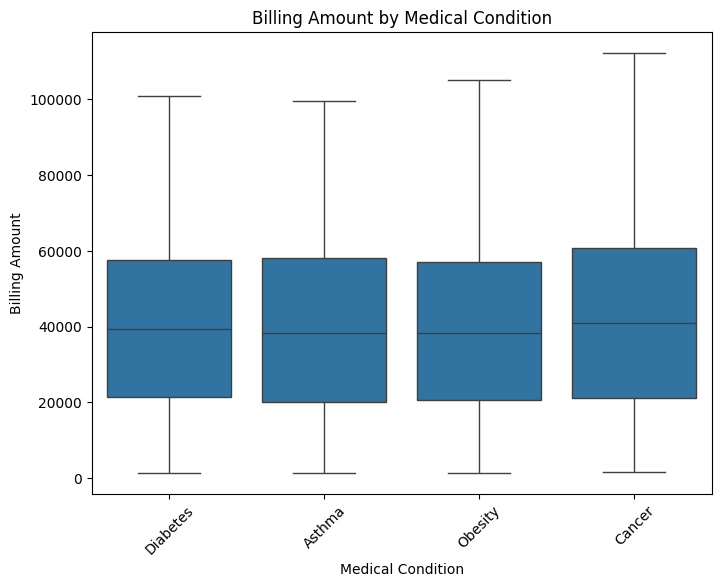

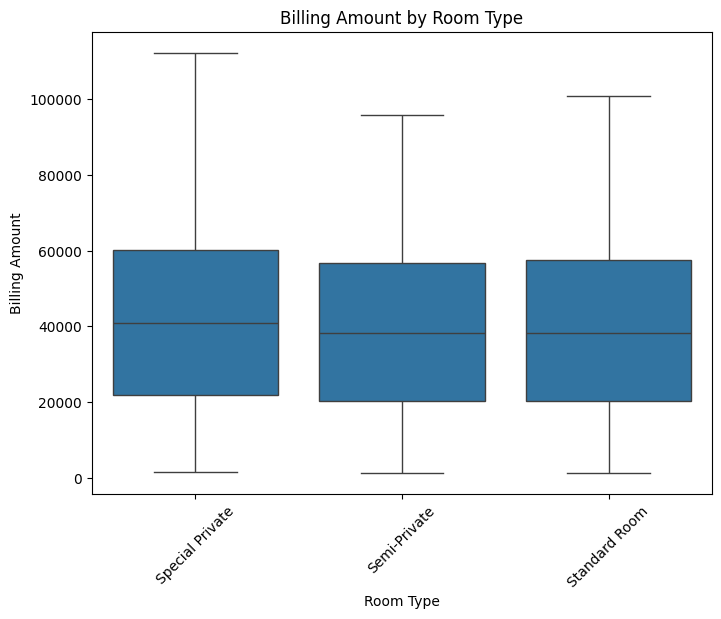

In [13]:
# Boxplot for Medical Condition vs Billing Amount
plt.figure(figsize=(8,6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=healthCareData)
plt.title('Billing Amount by Medical Condition')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Room Type vs Billing Amount
plt.figure(figsize=(8,6))
sns.boxplot(x='Room Type', y='Billing Amount', data=healthCareData)
plt.title('Billing Amount by Room Type')
plt.xticks(rotation=45)
plt.show()


**Key insights based on the two Boxplot:**

**1. Billing Amount by Medical Condition:**
  *   Cancer has the highest overall billing amount, likely due to the complexity and prolonged nature of its treatment.
  *   While diabetes, asthma, and obesity show relatively similar distributions in terms of costs, cancer stands out as the most expensive condition.
  *   All conditions show some degree of variability, with potential outliers suggesting a wide range of treatment plans or patient needs.


**2. Billing Amount by Room Type:**
  *   **Special Private rooms** are associated with higher billing amounts, likely due to the premium services or specialized care that comes with this room type.
  *   **Standard and Semi-Private rooms** tend to have lower billing amounts on average, but there is still considerable variability, suggesting that factors beyond room type, such as treatment complexity or length of stay, also significantly impact the total cost.
  *   The distribution across all room types shows that while there are cases of high billing amounts, most treatments fall within a similar range, with Special Private rooms standing out for higher overall costs.

# **Key strategies that the hospital can implement to drive growth:**

**1. Optimize Room Types:**
  *   Expand Special Private rooms to maximize revenue, as they generate the highest billing amounts.Expand Special Private rooms to maximize revenue, as they generate the highest billing amounts.
  *   Offer premium services and packages to attract patients willing to pay for higher-quality care.

**2. Focus on Chronic Conditions:**
  *   Enhance services for obesity and diabetes management, targeting these prevalent conditions with dedicated programs.
  *   Launch outreach programs for preventive care to build long-term patient loyalty.

**3. Enhance Cancer Care:**
  *   Expand cancer treatment options to cater to higher-cost treatments, positioning the hospital as a leader in oncology.
  *   Implement long-term cancer care programs to retain patients.

**4. Streamline Emergency & Urgent Care:**
*   Improve efficiency in emergency and urgent care to handle high patient volumes, reducing wait times and boosting patient satisfaction.




# **Model Development**

In [14]:
healthCareData

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Room Type
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,66669.570416,Elective,2022-12-01,Aspirin,Inconclusive,Special Private
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,71570.746878,Emergency,2023-06-15,Lipitor,Normal,Special Private
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,64449.854378,Emergency,2019-02-08,Lipitor,Normal,Special Private
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,35109.570533,Urgent,2020-05-03,Penicillin,Abnormal,Semi-Private
4,Mrs. Brandy Flowers,51,Male,O-,Diabetes,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,25352.498737,Urgent,2021-08-02,Paracetamol,Normal,Special Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,73937.026370,Elective,2022-08-02,Ibuprofen,Abnormal,Semi-Private
9996,Stephanie Evans,47,Female,AB+,Obesity,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,8943.051316,Emergency,2022-01-29,Ibuprofen,Normal,Semi-Private
9997,Christopher Martinez,54,Female,B-,Diabetes,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,77602.222905,Elective,2022-07-15,Ibuprofen,Normal,Standard Room
9998,Amanda Duke,84,Male,A+,Obesity,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,47202.786684,Urgent,2020-02-26,Penicillin,Normal,Special Private


In [15]:
healthCareData.keys()

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'Room Type'],
      dtype='object')

In [16]:
desired_columns = [ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Billing Amount', 'Admission Type',
       'Test Results', 'Room Type',]
healthCareData = healthCareData[desired_columns]

In [17]:
shape = healthCareData.shape

num_rows = shape[0]
num_columns = shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 10000
Number of columns: 9


In [18]:
healthCareData.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results,Room Type
0,81,Female,O-,Diabetes,Medicare,66669.570416,Elective,Inconclusive,Special Private
1,35,Male,O+,Asthma,UnitedHealthcare,71570.746878,Emergency,Normal,Special Private
2,61,Male,B-,Obesity,Medicare,64449.854378,Emergency,Normal,Special Private
3,49,Male,B-,Asthma,Medicare,35109.570533,Urgent,Abnormal,Semi-Private
4,51,Male,O-,Diabetes,UnitedHealthcare,25352.498737,Urgent,Normal,Special Private


In [19]:
healthCareData.dtypes

,0
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Insurance Provider,object
Billing Amount,float64
Admission Type,object
Test Results,object
Room Type,object


In [20]:
healthCareData['Gender'] = healthCareData['Gender'].astype('category')
healthCareData['Blood Type'] = healthCareData['Blood Type'].astype('category')
healthCareData['Medical Condition'] = healthCareData['Medical Condition'].astype('category')
healthCareData['Insurance Provider'] = healthCareData['Insurance Provider'].astype('category')
healthCareData['Admission Type'] = healthCareData['Admission Type'].astype('category')
healthCareData['Test Results'] = healthCareData['Test Results'].astype('category')
healthCareData['Room Type'] = healthCareData['Room Type'].astype('category')

<ipython-input-20-e7472486d5d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthCareData['Gender'] = healthCareData['Gender'].astype('category')
<ipython-input-20-e7472486d5d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthCareData['Blood Type'] = healthCareData['Blood Type'].astype('category')
<ipython-input-20-e7472486d5d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [21]:
healthCareData.dtypes

,0
Age,int64
Gender,category
Blood Type,category
Medical Condition,category
Insurance Provider,category
Billing Amount,float64
Admission Type,category
Test Results,category
Room Type,category


In [22]:
healthCareData = pd.get_dummies(healthCareData, columns=['Gender','Blood Type','Medical Condition','Insurance Provider', 'Admission Type', 'Test Results', 'Room Type'], drop_first=True)
healthCareData

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room
0,81,66669.570416,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
1,35,71570.746878,True,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,True,True,False
2,61,64449.854378,True,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,True,True,False
3,49,35109.570533,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
4,51,25352.498737,True,False,False,False,False,False,False,True,...,False,False,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,73937.026370,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9996,47,8943.051316,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
9997,54,77602.222905,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
9998,84,47202.786684,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,True,False


In [23]:
for column in healthCareData.columns:
    if healthCareData[column].dtype == 'bool':
        healthCareData[column] = healthCareData[column].astype(int)

healthCareData

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room
0,81,66669.570416,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,35,71570.746878,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,1,0
2,61,64449.854378,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
3,49,35109.570533,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,51,25352.498737,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,73937.026370,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9996,47,8943.051316,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
9997,54,77602.222905,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
9998,84,47202.786684,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0


In [24]:
healthCareData.corr()

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room
Age,1.000000,0.221485,-0.011894,-0.009251,-0.002928,0.001337,0.003856,-0.011896,0.010344,-0.006629,...,-0.002790,-0.015044,-0.009226,0.015040,-0.002826,0.004191,-0.009254,0.012275,0.013412,0.004435
Billing Amount,0.221485,1.000000,0.003680,0.014575,0.007495,-0.000221,0.010364,0.000679,-0.008846,-0.005243,...,0.001710,-0.000511,-0.018344,0.002823,-0.040343,0.024920,0.004854,-0.005517,0.056737,-0.026481
Gender_Male,-0.011894,0.003680,1.000000,-0.000028,0.004509,-0.012079,-0.000603,-0.003128,-0.015592,0.030355,...,0.027504,-0.001441,-0.027325,-0.000756,0.004975,-0.005412,-0.015028,0.000851,-0.004142,0.005686
Blood Type_A-,-0.009251,0.014575,-0.000028,1.000000,-0.157997,-0.079656,-0.111772,-0.169327,-0.240753,-0.160870,...,0.003239,-0.008303,-0.002233,0.003953,0.011377,-0.012439,-0.011959,0.007283,-0.002626,-0.017997
Blood Type_AB+,-0.002928,0.007495,0.004509,-0.157997,1.000000,-0.062822,-0.088151,-0.133542,-0.189873,-0.126872,...,-0.004074,-0.007931,0.011887,-0.008128,-0.015548,0.013646,0.011477,-0.008140,0.005740,-0.008703
Blood Type_AB-,0.001337,-0.000221,-0.012079,-0.079656,-0.062822,1.000000,-0.044442,-0.067327,-0.095727,-0.063964,...,0.009534,0.001974,-0.008965,-0.001054,0.004457,-0.003801,0.012840,-0.013963,-0.004043,0.004354
Blood Type_B+,0.003856,0.010364,-0.000603,-0.111772,-0.088151,-0.044442,1.000000,-0.094472,-0.134322,-0.089753,...,0.006049,0.024547,-0.005392,-0.005456,0.014725,-0.016222,0.014175,-0.017028,-0.000589,0.017332
Blood Type_B-,-0.011896,0.000679,-0.003128,-0.169327,-0.133542,-0.067327,-0.094472,1.000000,-0.203489,-0.135970,...,-0.006313,-0.001806,0.012255,-0.000490,-0.013778,-0.006098,-0.013056,-0.001951,-0.022516,0.015351
Blood Type_O+,0.010344,-0.008846,-0.015592,-0.240753,-0.189873,-0.095727,-0.134322,-0.203489,1.000000,-0.193324,...,0.005373,-0.003436,-0.012141,0.011516,-0.005861,0.021803,0.009009,0.003008,-0.003719,-0.005266
Blood Type_O-,-0.006629,-0.005243,0.030355,-0.160870,-0.126872,-0.063964,-0.089753,-0.135970,-0.193324,1.000000,...,-0.022222,0.002825,0.020543,-0.004956,0.011844,-0.015218,-0.015320,0.011559,0.009084,-0.004104


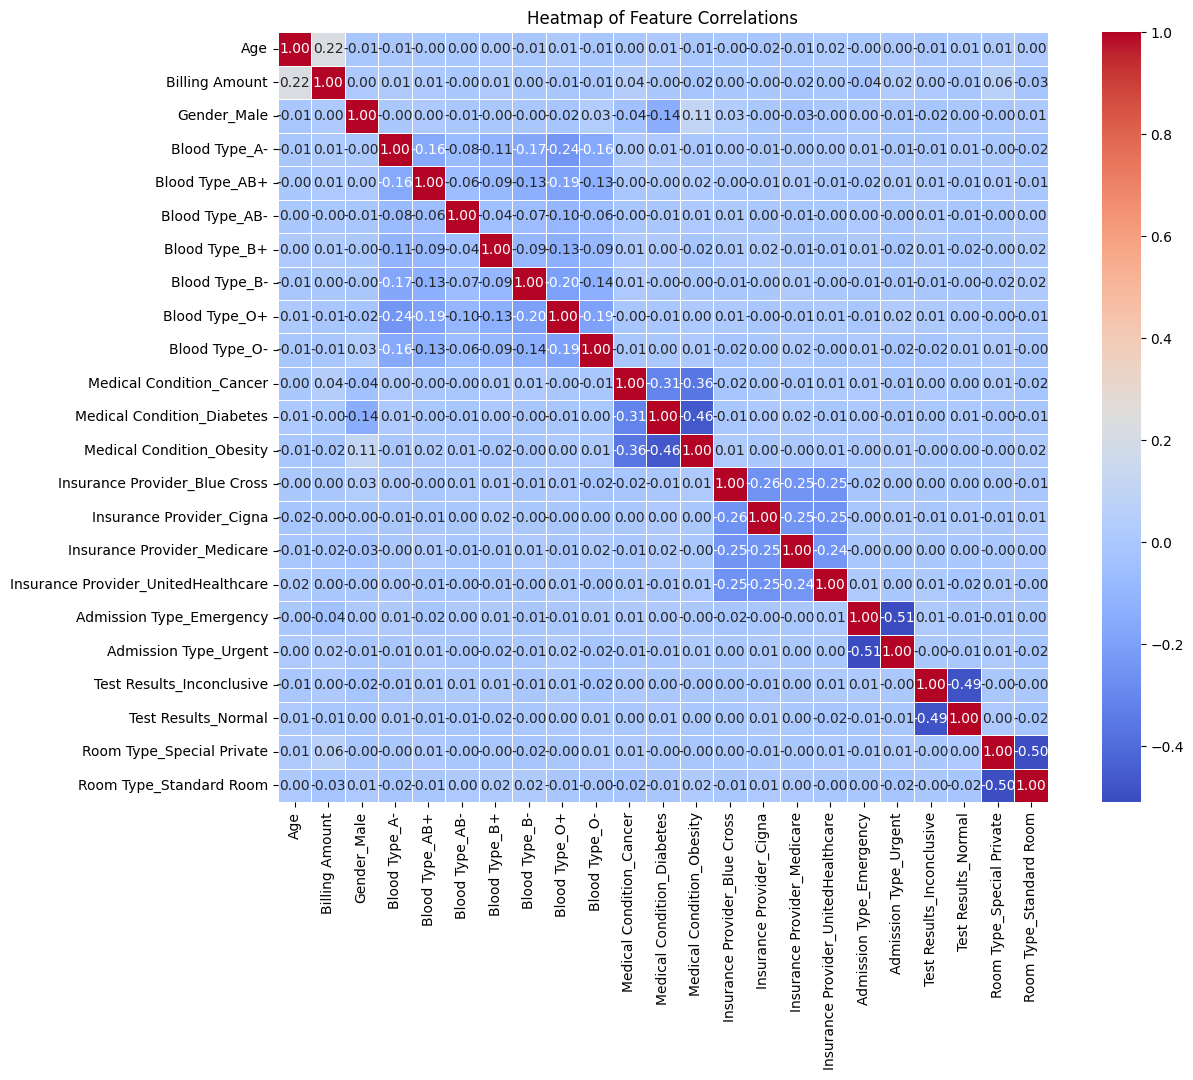

In [25]:
corr = healthCareData.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Heatmap of Feature Correlations')
plt.show()

In [26]:
target = healthCareData['Billing Amount']
predictors = healthCareData.drop(['Billing Amount'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 22) (3000, 22) (7000,) (3000,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

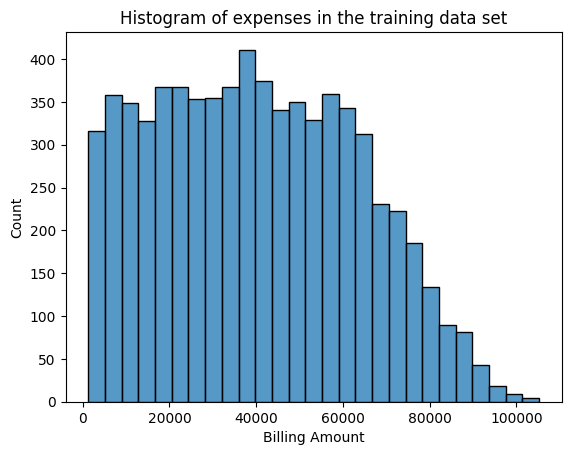

In [27]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of expenses in the training data set")

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

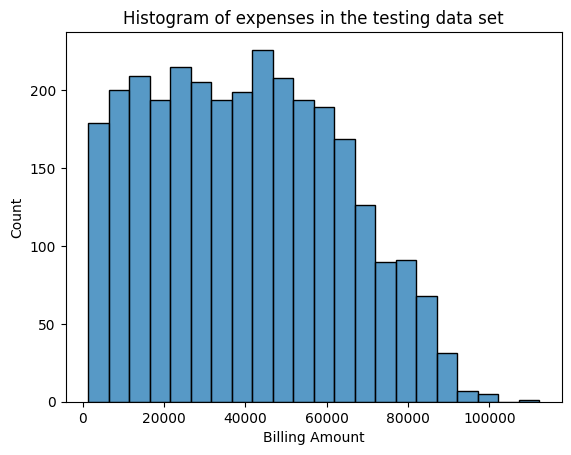

In [28]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of expenses in the testing data set")

In [29]:
# Build a simple linear regression model with only bmi as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train, target_train)

LinearRegression()

In [30]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Billing Amount   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     17.55
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           3.13e-66
Time:                        19:29:17   Log-Likelihood:                -80072.
No. Observations:                7000   AIC:                         1.602e+05
Df Residuals:                    6977   BIC:                         1.603e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Summary:**

1. **Age, cancer, and Special Private room** types are significant drivers of higher billing amounts.
2. Patients with insurance from **Medicare, Cigna, and UnitedHealthcare** tend to have significantly lower billing amounts compared to other patients.

In [31]:
prediction_on_test = model1.predict(predictors_test)

In [32]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 18995.83268336568
RMSE: 22247.945984322683


**Model Performance:**
1. **MAE (Mean Absolute Error):** The model's average prediction error is approximately 18,996 units, indicating how close predictions are to actual billing amounts.
2. **RMSE (Root Mean Squared Error):** The RMSE is 22,248 units, meaning that the model's errors are more heavily influenced by larger discrepancies, which RMSE penalizes more strongly.

# **Feature Engineering :**

1. **Length of Stay Calculation:**
  *   **Method:** I computed the Length of Stay by converting the Date of Admission and Discharge Date into datetime format, then calculated the difference in days.
  *   **Purpose:** This feature captures how long a patient stays in the hospital, which can be a crucial factor in determining billing amounts. Longer stays are generally associated with higher costs.

2. **Age, Medical Condition, and Room Type Interaction:**
  *   **Method:** I created a new feature called AgeAbove50_Cancer_PrivateRoom. This binary feature indicates whether a patient is over 50 years old, has Cancer, and is staying in a Special Private Room.
  *   **Purpose:** This feature highlights a specific patient segment that might incur higher costs due to their age, medical condition, and room type. By combining these factors, I aimed to capture additional variability in the billing amounts, which could improve model accuracy.





In [33]:
Dataset['Date of Admission'] = pd.to_datetime(Dataset['Date of Admission'])
Dataset['Discharge Date'] = pd.to_datetime(Dataset['Discharge Date'])

# Calculate length of stay in days
healthCareData['Length of Stay'] = (Dataset['Discharge Date'] - Dataset['Date of Admission']).dt.days


In [34]:
healthCareData['AgeAbove50_Cancer_PrivateRoom'] = np.where(
    (healthCareData['Age'] > 50) &
    (healthCareData['Medical Condition_Cancer'] == 1) &
    (healthCareData['Room Type_Special Private'] == 1), 1, 0
)

In [35]:
healthCareData

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room,Length of Stay,AgeAbove50_Cancer_PrivateRoom
0,81,66669.570416,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,14,0
1,35,71570.746878,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,0,14,0
2,61,64449.854378,1,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,30,0
3,49,35109.570533,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,51,25352.498737,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,1,0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,73937.026370,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,4,0
9996,47,8943.051316,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,23,0
9997,54,77602.222905,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,14,0
9998,84,47202.786684,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,20,0


In [36]:
target = healthCareData['Billing Amount']
predictors = healthCareData.drop(['Billing Amount'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 24) (3000, 24) (7000,) (3000,)


In [37]:
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [38]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Billing Amount   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     16.12
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           3.70e-65
Time:                        19:29:17   Log-Likelihood:                -80072.
No. Observations:                7000   AIC:                         1.602e+05
Df Residuals:                    6975   BIC:                         1.604e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Summary:**

1. **Age, Medical Condition: Cancer, and Room Type: Special Private** are strong drivers of higher billing amounts.
2. Insurance providers, such as **Medicare and UnitedHealthcare**, significantly reduce billing amounts.
3. The interaction term **AgeAbove50_Cancer_PrivateRoom** suggests that certain older cancer patients in special rooms may have lower-than-expected billing, indicating potential pricing adjustments for these groups.
4. **Gender, blood type**, and some common medical conditions (like diabetes and obesity) are not significant factors in determining billing amounts.

In [39]:
prediction_on_test = model2.predict(predictors_test)

In [40]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 18994.802186229037
RMSE: 22247.203024752416


**Model Performance:**
1. **MAE (Mean Absolute Error):** The model's average prediction error is now 18,994.80 units, showing a very minor improvement from the previous error of 18,995.83.
2. **RMSE (Root Mean Squared Error):** The RMSE is now 22,247.20 units, which is a very slight decrease from the previous 22,247.95.

**Conclusion:**

After comparing Model 1 (without feature engineering) and Model 2 (with feature engineering):

1. **MAE:** Model 1: 18,995.83 → Model 2: 18,994.80 (decreased by 1.03 units, showing a minor improvement).
2. **RMSE:** Model 1: 22,247.95 → Model 2: 22,247.20 (decreased by 0.75 units, indicating slight improvement in handling larger errors).
Overall, feature engineering led to only a very slight improvement in the model's performance.

**The feature engineering (model2) introduced (Length of Stay and interaction between Age, Cancer, and Room Type) provides a slight improvement in the model’s predictive accuracy.** However, further feature engineering or tuning may be required to achieve more substantial gains in model performance.